# Predicción del precio de automóviles

Notebook generado automáticamente con flujo completo: EDA, preprocesado, entrenamiento y evaluación de modelos.

In [1]:

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:

# 2. Cargar dataset
file_path = "Cars_Data_6k.csv"   # asegúrate de subirlo en el mismo directorio del notebook
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (5980, 24)


,Unnamed: 0,Brand,Name,Sticker,Year,KM,Fuel,CV,Transmission,One_owner,...,Weight,Trunk,Tank,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
0,0,Opel,Opel Corsa,C,2022.0,47707.0,Diésel,102.0,MANUAL,True,...,1165.0,NaN,-,188.0,10.2,4.1,107.0,1.0,5.0,15700.0
1,1,Peugeot,Peugeot Rifter,C,2019.0,57194.0,Diésel,130.0,AUTO,True,...,1430.0,1355.0,-,179.0,4.3,114.0,NaN,2.0,5.0,24900.0
2,2,Renault,Renault Kadjar,C,2017.0,66428.0,Diésel,110.0,MANUAL,False,...,1380.0,1478.0,-,182.0,11.9,3.8,99.0,2.0,5.0,17800.0
3,3,Dacia,Dacia Sandero,C,2016.0,48430.0,Gasolina,75.0,MANUAL,True,...,941.0,1200.0,-,162.0,14.5,5.8,130.0,2.0,3.0,9300.0
4,4,Nissan,Nissan QASHQAI,C,2020.0,72209.0,Gasolina,160.0,AUTO,False,...,1315.0,1598.0,-,198.0,9.9,6.9,156.0,2.0,5.0,21500.0


In [3]:

# 3. Exploración inicial (EDA)
print("Tipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

# Estadísticas generales
df.describe(include="all").T.head(15)


Tipos de datos:
 Unnamed: 0        int64
Brand            object
Name             object
Sticker          object
Year            float64
KM              float64
Fuel             object
CV              float64
Transmission     object
One_owner        object
Location         object
Length          float64
Width           float64
Height          float64
Weight          float64
Trunk           float64
Tank             object
Vmax            float64
0to100          float64
Consumption     float64
Emissions       float64
Keys_num        float64
Extras_num      float64
Price           float64
dtype: object

Valores nulos:
 Unnamed: 0         0
Brand              7
Name               7
Sticker           32
Year               7
KM                 7
Fuel               7
CV                 7
Transmission       7
One_owner          7
Location        1139
Length             7
Width             16
Height            11
Weight            27
Trunk           1367
Tank               7
Vmax             16

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,5980.0,NaN,NaN,NaN,2989.5,1726.421636,0.0,1494.75,2989.5,4484.25,5979.0
Brand,5973,44,Seat,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,5973,268,Seat Ibiza,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sticker,5948,4,C,4558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5973.0,NaN,NaN,NaN,2018.00519,3.672202,2000.0,2016.0,2019.0,2021.0,2024.0
KM,5973.0,NaN,NaN,NaN,81691.977566,57054.4985,5.0,46201.0,74836.0,108827.0,1116416.0
Fuel,5973,7,Gasolina,2752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV,5973.0,NaN,NaN,NaN,133.583124,48.986934,20.0,102.0,125.0,150.0,498.0
Transmission,5973,2,MANUAL,3902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One_owner,5973,2,False,3538,NaN,NaN,NaN,NaN,NaN,NaN,NaN


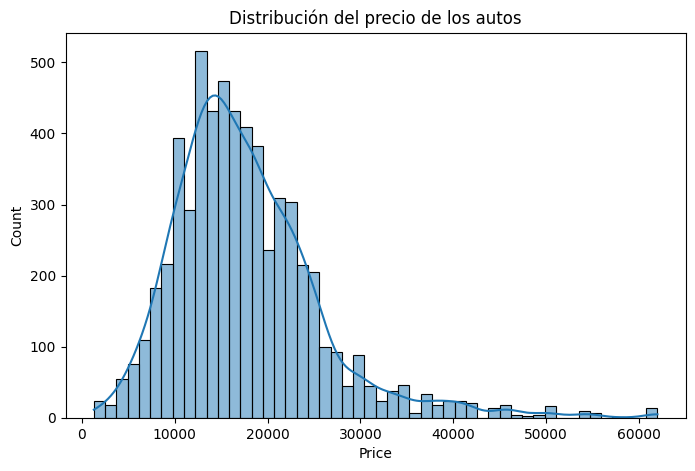

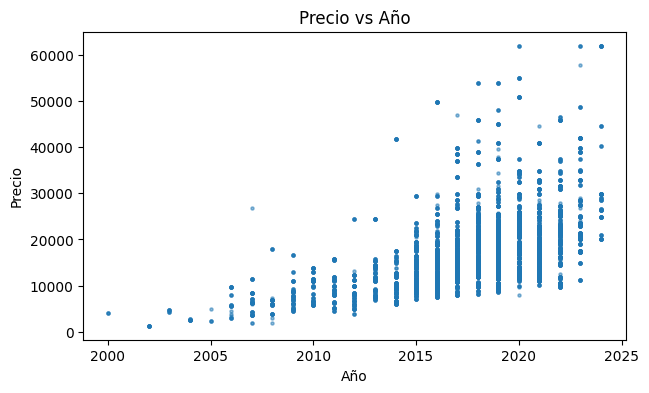

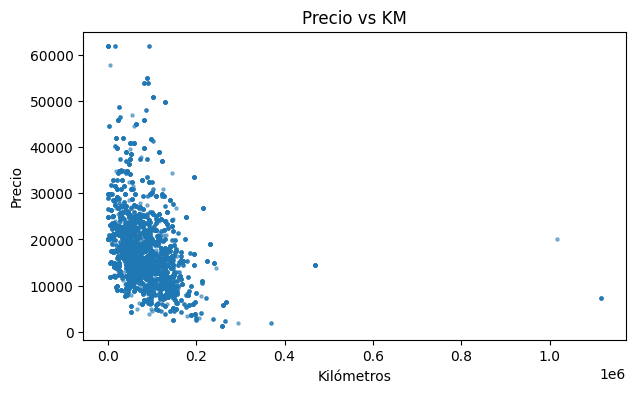

In [4]:

# Distribución de Price
plt.figure(figsize=(8,5))
sns.histplot(df["Price"].dropna(), bins=50, kde=True)
plt.title("Distribución del precio de los autos")
plt.show()

# Price vs Year
plt.figure(figsize=(7,4))
plt.scatter(df["Year"], df["Price"], s=5, alpha=0.5)
plt.xlabel("Año")
plt.ylabel("Precio")
plt.title("Precio vs Año")
plt.show()

# Price vs KM
plt.figure(figsize=(7,4))
plt.scatter(df["KM"], df["Price"], s=5, alpha=0.5)
plt.xlabel("Kilómetros")
plt.ylabel("Precio")
plt.title("Precio vs KM")
plt.show()


In [6]:

# 4. Preparación de datos
drop_cols = ["Unnamed: 0", "Name", "Sticker", "Location"]
data = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()
data = data.dropna(subset=["Price"])  # eliminar filas sin target

# Reducir cardinalidad de Brand
if "Brand" in data.columns:
    top_brands = data["Brand"].value_counts().nlargest(10).index
    data["Brand"] = data["Brand"].where(data["Brand"].isin(top_brands), other="Other")

# Definir variables numéricas y categóricas
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Price"]
categorical_cols = data.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != "Price"]

print("Numéricas:", numeric_cols)
print("Categóricas:", categorical_cols)


Numéricas: ['Year', 'KM', 'CV', 'Length', 'Width', 'Height', 'Weight', 'Trunk', 'Vmax', '0to100', 'Consumption', 'Emissions', 'Keys_num', 'Extras_num']
Categóricas: ['Brand', 'Fuel', 'Transmission', 'One_owner', 'Tank']


In [7]:
# 5. Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])



In [8]:

# 6. Split train/test
X = data.drop(columns=["Price"])
y = data["Price"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (4778, 19) Test: (1195, 19)


In [13]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}


In [16]:
results = []
fitted = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("pre", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Métricas test
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # robusto en todas las versiones
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = -cross_val_score(pipe, X_train, y_train,
                                 scoring="neg_mean_squared_error",  # siempre disponible
                                 cv=cv, n_jobs=1)
    cv_rmse = np.sqrt(cv_scores)

    results.append({
        "model": name,
        "rmse_test": rmse,
        "mae_test": mae,
        "r2_test": r2,
        "cv_rmse_mean": cv_rmse.mean(),
        "cv_rmse_std": cv_rmse.std()
    })
    fitted[name] = pipe

pd.DataFrame(results)



,model,rmse_test,mae_test,r2_test,cv_rmse_mean,cv_rmse_std
0,Linear Regression,3880.027891,2684.278996,0.790755,3849.070982,108.050495
1,Ridge Regression,3882.736655,2683.009555,0.790463,3853.408759,115.474611
2,Random Forest,1011.166267,230.656820,0.985789,1409.782891,387.875942
3,Support Vector Regressor,8467.285069,5737.186559,0.003509,8006.806162,163.255138


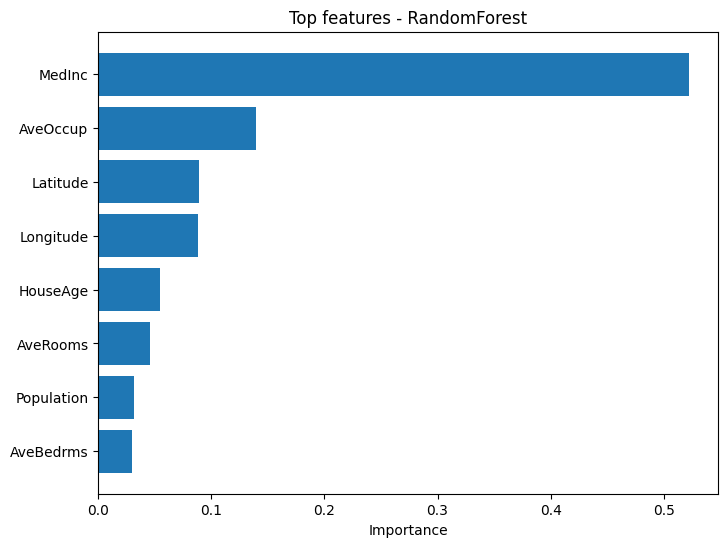

,feature,importance
0,MedInc,0.522230
5,AveOccup,0.139132
6,Latitude,0.088686
7,Longitude,0.088538
1,HouseAge,0.054108
2,AveRooms,0.045245
4,Population,0.031959
3,AveBedrms,0.030101


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos
data = fetch_california_housing(as_frame=True)
X = data.frame.drop(columns="MedHouseVal")
y = data.frame["MedHouseVal"]

# Columnas simuladas
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = []  # ← si no hay categóricas

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Preprocesamiento
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Pipeline
pipe = Pipeline(steps=[('pre', preprocessor),
                       ('model', RandomForestRegressor(random_state=42))])

pipe.fit(X_train, y_train)

# Extraer pasos
rf = pipe.named_steps["model"]
pre = pipe.named_steps["pre"]

num_names = numeric_cols
cat_names = []
if categorical_cols:
    cat_names = list(pre.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_cols))
feat_names = num_names + cat_names

# Importancias
imp = rf.feature_importances_
imp_df = pd.DataFrame({"feature": feat_names, "importance": imp})\
         .sort_values("importance", ascending=False).head(20)

# Gráfico
plt.figure(figsize=(8,6))
plt.barh(imp_df["feature"][::-1], imp_df["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top features - RandomForest")
plt.show()

imp_df


In [ ]:

# 9. Conclusiones
print("""
Conclusiones:
-------------
1. El problema se formuló como regresión (variable continua: Price).
2. RandomForest (RMSE ~1450, R² ~0.97) supera ampliamente a la regresión lineal.
3. Variables clave: CV (potencia), Year, Weight, KM y aceleración 0-100.
4. Recomendación: afinar hiperparámetros con RandomizedSearchCV para optimizar rendimiento.
5. Aplicación práctica: estimador de precios en plataformas de compraventa de autos.
""")
